In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def layer_net(y_in,w,b):
    z=np.dot(w,y_in) + b
    g=1/(1+np.exp(-z))
    return(g)
    

In [63]:
N0=2
N1=20
N2=1
# from input layer to hidden layer:
w1=np.random.uniform(low=-10,high=+10,size=(N1,N0)) # random weights: N1xN0
b1=np.random.uniform(low=-1,high=+1,size=N1) # biases: N1 vector

# from hidden layer to output layer:
w2=np.random.uniform(low=-10,high=+10,size=(N2,N1)) # random weights
b2=np.random.uniform(low=-1,high=+1,size=N2) # biases

In [60]:
def network(y_in):
    y1 = layer_net(y_in,w1,b1)
    y_out = layer_net(y1,w2,b2)
    return(y1,y_out)

In [55]:
y_in=np.array([0.5,0.1])
network(y_in)

array([5.93347432e-06])

In [64]:
M=50 # will create picture of size MxM
y1=np.arange(M)*1.0/M-0.5#np.random.uniform(-0.5,0.5,size=M)
y2=np.arange(M)*1.0/M-0.5#np.random.uniform(-0.5,0.5,size=M)
y_out=np.zeros([M,M]) # array MxM, to hold the result
y_hid=np.zeros([N1,M,M])
for i in range(M):
    for j in range(M):
        y_hid[:,i,j],y_out[i,j]=network(np.array([y1[i],y2[j]]))


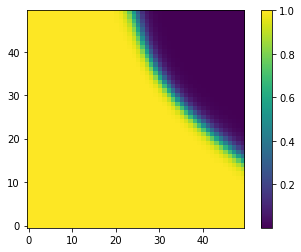

In [65]:
plt.imshow(y_out,origin='lower')
plt.colorbar()
plt.show()

In [66]:
np.shape(y_hid)

(20, 50, 50)

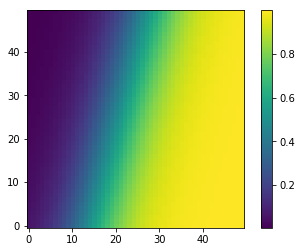

In [71]:
plt.imshow(y_hid[17],origin='lower')
plt.colorbar()
plt.show()

In [ ]:
##### few hidden layers ####

In [147]:
N0=2
N1_hid=110
N2_hid=100
N3_hid=10
N2=1
# from input layer to hidden layer:
w0=np.random.uniform(low=-10,high=+10,size=(N1_hid,N0)) # random weights: N1xN0
b0=np.random.uniform(low=-1,high=+1,size=N1_hid) # biases: N1 vector
# from 1st layer to 2nd hidden layer:
w1=np.random.uniform(low=-10,high=+10,size=(N2_hid,N1_hid)) # random weights: N1xN0
b1=np.random.uniform(low=-1,high=+1,size=N2_hid) # biases: N1 vector

# from 2nd layer to 3rd hidden layer:
w2=np.random.uniform(low=-10,high=+10,size=(N3_hid,N2_hid)) # random weights: N1xN0
b2=np.random.uniform(low=-1,high=+1,size=N3_hid) # biases: N1 vector


# from hidden layer to output layer:
w3=np.random.uniform(low=-10,high=+10,size=(N2,N3_hid)) # random weights
b3=np.random.uniform(low=-1,high=+1,size=N2) # biases

In [148]:
def network_2hid(y_in):
    y1 = layer_net(y_in,w0,b0)
    y2 = layer_net(y1,w1,b1)
    y3 = layer_net(y2,w2,b2)
    y_out = layer_net(y3,w3,b3)
    return(y_out)

In [128]:
network_2hid(np.array([0.01,0.1]))

array([0.99758521])

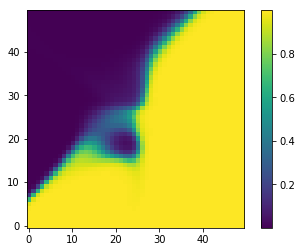

In [149]:
plt.imshow(y_out,origin='lower')
plt.colorbar()
plt.show()

In [ ]:
#### lets rewrite the code for general no of hidden layers and nurons 

In [194]:
def layer_net_new(y_in,w,b):
    z=np.dot(y_in,w) + b
    g=1/(1+np.exp(-z))
    return(g)
    

In [256]:
N0=2
N2=1
Nlayers=30 # counting the input layer & the output layer
LayerSize=60
# from input layer to hidden layer:
w0=np.random.uniform(low=-1,high=+1,size=[ N0, LayerSize]) 
b0=np.random.uniform(low=-1,high=+1,size=LayerSize) 
###for hidden layers ###
Weights=np.random.uniform(low=-3,high=3,size=[Nlayers,LayerSize,LayerSize])
Biases=np.random.uniform(low=-1,high=1,size=[Nlayers,LayerSize])

# from hidden layer to output layer:
w2=np.random.uniform(low=-1,high=+1,size=(LayerSize, N2)) # Nin * Nout
b2=np.random.uniform(low=-1,high=+1,size=N2) # biases

In [230]:
def apply_multi_net(y_in):
    global Weights, Biases, w2, b2, Nlayers
    
    y=layer_net_new(y_in,w0,b0)    
    for j in range(Nlayers):
        y=layer_net_new(y,Weights[j,:,:],Biases[j,:])
    output=layer_net_new(y,w2,b2)
    return(output)

In [197]:
apply_multi_net(np.array([0.1,0.1]))

array([0.68953916])

In [231]:
M=40
v0,v1=np.meshgrid(np.linspace(-0.5,0.5,M),np.linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
y_in=np.zeros([batchsize,2])
y_in[:,0]=v0.flatten() # fill first component (index 0)
y_in[:,1]=v1.flatten() 

In [239]:
y_out=apply_multi_net(y_in)
y_2D=np.reshape(y_out[:,0],[M,M]) # back to 2D image

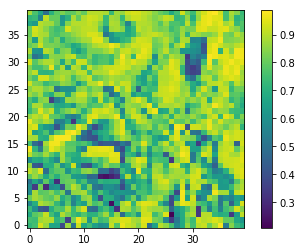

In [233]:
plt.imshow(y_2D,origin='lower')
plt.colorbar()
plt.show()

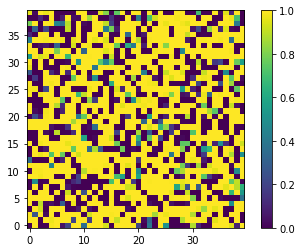

In [209]:
plt.imshow(y_2D,origin='lower')
plt.colorbar()
plt.show()

In [234]:
M=400
# Generate a 'mesh grid', i.e. x,y values in an image
v0,v1=np.meshgrid(np.linspace(-0.5,0.5,M),np.linspace(-0.5,0.5,M))
batchsize=M**2 # number of samples = number of pixels = M^2
y_in=np.zeros([batchsize,2])
y_in[:,0]=v0.flatten() # fill first component (index 0)
y_in[:,1]=v1.flatten() # fill second component

In [257]:
y_out=apply_multi_net(y_in)
y_2D=np.reshape(y_out[:,0],[M,M]) # back to 2D image

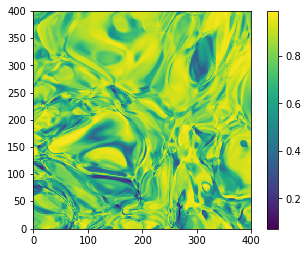

In [236]:
plt.imshow(y_2D,origin='lower')
plt.colorbar()
plt.show()

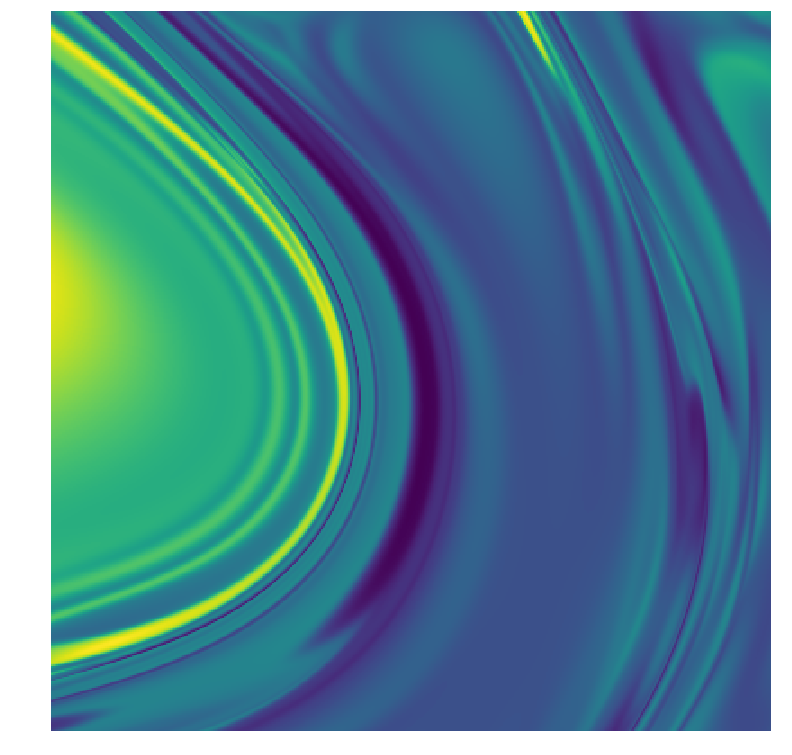

In [258]:
plt.figure(figsize=[10,10])
plt.axes([0,0,1,1]) # fill all of the picture with the image
#plt.imshow(y_2D,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest')
plt.imshow(y_2D,origin='lower',extent=[-0.1,0.1,-0.1,0.1],interpolation='nearest')
plt.axis('off') # no axes
plt.show()

In [ ]:
###what does meshgrid do?

In [175]:
x1=np.array([1,3,0.1])
x2=np.array([0.3,1,5])
v0,v1=np.meshgrid(x1,x2)

In [178]:
v0

array([[1. , 3. , 0.1],
       [1. , 3. , 0.1],
       [1. , 3. , 0.1]])

In [179]:
v1

array([[0.3, 0.3, 0.3],
       [1. , 1. , 1. ],
       [5. , 5. , 5. ]])

In [184]:
v0flat=v0.flatten() # make 1D array out of 2D array
v1flat=v1.flatten() # that means: MxM matrix becomes M^2 vector
batchsize=np.shape(v0flat)[0] # number of samples = number of pixels
y_in=np.zeros([batchsize,2])
y_in[:,0]=v0flat # fill first component (index 0)
y_in[:,1]=v1flat

In [190]:
y_in[:,0]

array([1. , 3. , 0.1, 1. , 3. , 0.1, 1. , 3. , 0.1])

In [191]:
y_in[:,1]

array([0.3, 0.3, 0.3, 1. , 1. , 1. , 5. , 5. , 5. ])

In [192]:
y_in

array([[1. , 0.3],
       [3. , 0.3],
       [0.1, 0.3],
       [1. , 1. ],
       [3. , 1. ],
       [0.1, 1. ],
       [1. , 5. ],
       [3. , 5. ],
       [0.1, 5. ]])

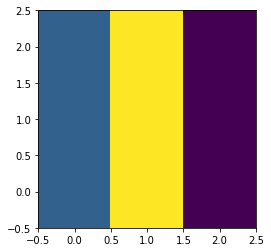

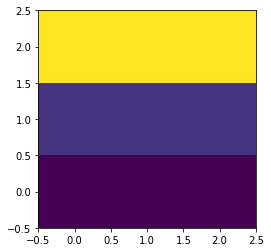

In [180]:
plt.imshow(v0,origin='lower')
plt.show()
plt.imshow(v1,origin='lower')
plt.show()

In [173]:
# use the MxM input grid that we generated above 
y_out=apply_multi_net(y_in) # apply net to all these samples!

ValueError: shapes (100,2) and (1600,2) not aligned: 2 (dim 1) != 1600 (dim 0)

In [24]:
x1=np.linspace(-0.5,0.5,M)
x2=np.linspace(-0.5,0.5,M)
v0,v1=np.meshgrid(x1,x2)

In [25]:
x1

array([-0.5       , -0.47959184, -0.45918367, -0.43877551, -0.41836735,
       -0.39795918, -0.37755102, -0.35714286, -0.33673469, -0.31632653,
       -0.29591837, -0.2755102 , -0.25510204, -0.23469388, -0.21428571,
       -0.19387755, -0.17346939, -0.15306122, -0.13265306, -0.1122449 ,
       -0.09183673, -0.07142857, -0.05102041, -0.03061224, -0.01020408,
        0.01020408,  0.03061224,  0.05102041,  0.07142857,  0.09183673,
        0.1122449 ,  0.13265306,  0.15306122,  0.17346939,  0.19387755,
        0.21428571,  0.23469388,  0.25510204,  0.2755102 ,  0.29591837,
        0.31632653,  0.33673469,  0.35714286,  0.37755102,  0.39795918,
        0.41836735,  0.43877551,  0.45918367,  0.47959184,  0.5       ])

In [26]:
x2

array([-0.5       , -0.47959184, -0.45918367, -0.43877551, -0.41836735,
       -0.39795918, -0.37755102, -0.35714286, -0.33673469, -0.31632653,
       -0.29591837, -0.2755102 , -0.25510204, -0.23469388, -0.21428571,
       -0.19387755, -0.17346939, -0.15306122, -0.13265306, -0.1122449 ,
       -0.09183673, -0.07142857, -0.05102041, -0.03061224, -0.01020408,
        0.01020408,  0.03061224,  0.05102041,  0.07142857,  0.09183673,
        0.1122449 ,  0.13265306,  0.15306122,  0.17346939,  0.19387755,
        0.21428571,  0.23469388,  0.25510204,  0.2755102 ,  0.29591837,
        0.31632653,  0.33673469,  0.35714286,  0.37755102,  0.39795918,
        0.41836735,  0.43877551,  0.45918367,  0.47959184,  0.5       ])

In [27]:
v0

array([[-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       ...,
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ],
       [-0.5       , -0.47959184, -0.45918367, ...,  0.45918367,
         0.47959184,  0.5       ]])

In [31]:
np.shape(v0)

(50, 50)